## Algoritmus k-najbližších susedov (KNN) a zhlukovanie (Clustering)

V tomto notebooku sa naučíme o:
- **Algoritmus k-najbližších susedov** – ide o algoritmus učenia pod dohľadom (supervised learning), ktorý robí predpovede pre nový dátový bod na základe najbližších bodov v priestore, predpokladá, že body, ktoré sú si blízke, majú podobné vlastnosti
- **Clustering** – ide o prístup učenia bez dohľadu (unsupervised learning), ktorý hľadá prirodzené zoskupenia v dátach a odhaľuje vzory a vzťahy bez potreby vopred definovaných tried alebo označení

## Praktický príklad
### Klasifikácia kvetov

- teraz aplikujeme KNN a Clustering na klasifikáciu a analýzu kvetov do jednotlivých druhov na základe ich vlastností 

Vlastnosti:
- dĺžka okvetného listu
- šírka okvetného listu

Triedy:
- setosa
- versicolor
- virginica

In [36]:
# Importovanie

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans 
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [37]:
# Načítanie dát pre modely

data = load_iris()
X = data.data[:, :2]
y = data.target
target_names = data.target_names
print(f"Number of samples: {X.shape[0]}")

Number of samples: 150


## KNN
- **Princíp**: algoritmus klasifikuje nové dátové body na základe väčšinovej triedy ich **k** najbližších susedov v priestore
- **Miera vzdialenosti**: podobnosť medzi dátovými bodmi sa určuje pomocou metrík, ako je Euklidovská alebo Manhattanská vzdialenosť
- **Parameter k**: určuje, koľko susedov sa zohľadňuje pri rozhodovaní — malé k robí model citlivým na šum, zatiaľ čo veľké k môže príliš vyhladiť hranice medzi triedami
- **Predikcia**: pri predpovedi nového vstupu algoritmus vyhľadá **k** najbližších vzoriek z dát a priradí triedu, ktorá sa medzi nimi vyskytuje najčastejšie
- **Proces učenia**: KNN nevykonáva žiadne explicitné trénovanie - iba uchováva dáta a predpovede robí na základe ich blízkosti — preto sa označuje ako „lenivé učenie“

In [60]:
# Rozdelenie dát na trénovaciu a testovaciu množinu

trainSize = float(input("Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.  "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - trainSize, random_state=42)

Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.   0.2


In [61]:
# Nastavenie parametra K

k = int(input("Hodnota K:"))

Hodnota K: 3


In [62]:
# Trénovanie modelu

model = KNeighborsClassifier(
    n_neighbors=k,
    metric='euclidean',  # 'euclidean' 'manhattan'
    weights='distance'  # 'distance' 'uniform' 
)
model.fit(X_train, y_train)

# Testovanie modelu
y_pred = model.predict(X_test)

## Interpretácia výsledkov modelu
### Na interpretáciu využijeme
- presnosť
- matica zámen
- rozhodovacie hranice

In [63]:
acc = accuracy_score(y_test, y_pred)
print(f"Presnosť: {acc:.4f}")

Presnosť: 0.7583


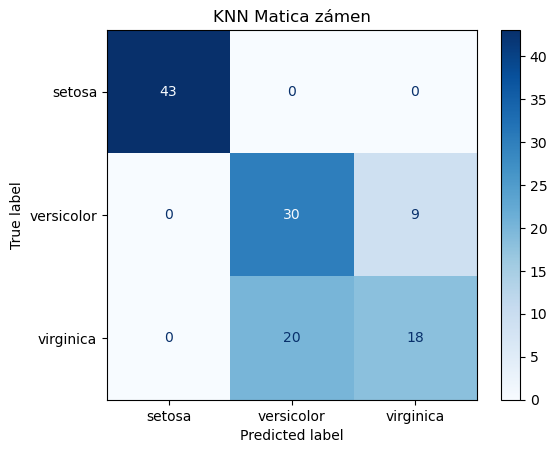

In [64]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Matica zámen")
plt.show()

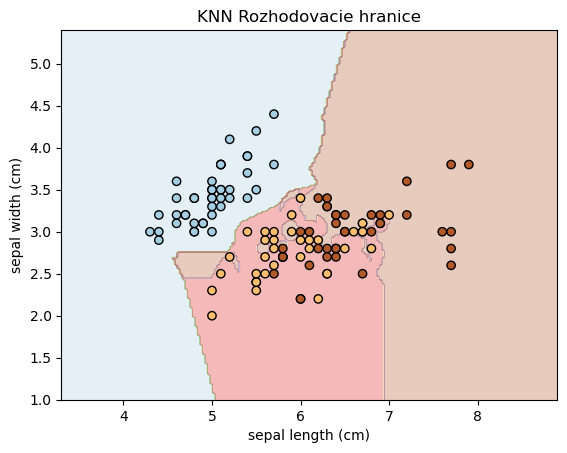

In [65]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KNN Rozhodovacie hranice")
plt.show()

## Clustering
- **Principle**: clustering is an unsupervised learning technique where the model has access only to input data and no predefined output labels
- **Goal**: to divide data into groups (clusters) so that objects within the same cluster are as similar as possible, while objects in different clusters are as different as possible
- **Cluster definition**: each cluster represents a collection of data points sharing common characteristics or proximity in the feature space
- **Data segmentation**: clustering helps reveal hidden patterns or structures within data, providing insight into its natural organization  
- **K-Means**: partitions data into *k* clusters based on distance from cluster centroids, which are iteratively updated until convergence  
- **DBSCAN**: groups points based on density, forming clusters of closely packed points while marking isolated points as outliers  

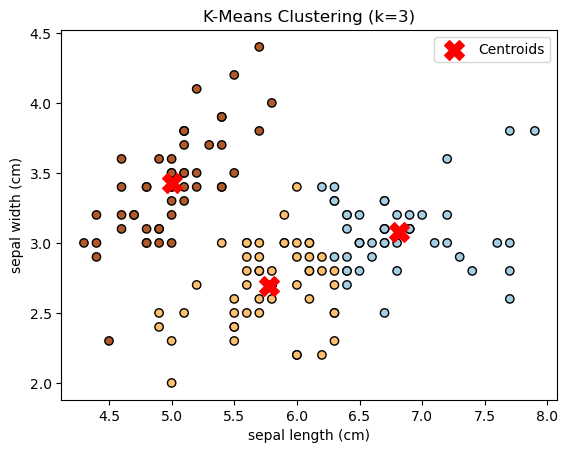

Adjusted Rand Index (ARI): 0.60
Silhouette Score: 0.45


In [6]:
#K-Means

#Train
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

#Cluster Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap=plt.cm.Paired, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("K-Means Clustering (k=3)")
plt.legend()
plt.show()

#ARI
ari = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

#Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.2f}")
